#*Twitter US Airline Sentiment Analysis*
**In this assignment, you will explore Natural Language Processing (NLP) concepts by performing sentiment analysis on a Twitter dataset. The dataset contains 1.6 million tweets labeled with positive or negative sentiment.**

Dataset Link: https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv

Twitter US Airline Sentiment Analysis
In this activity, you will perform sentiment analysis on the Twitter US Airline Sentiment dataset.


In [130]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
# import data from drive
airline = pd.read_csv("/content/drive/MyDrive/archive/Tweets.csv")

In [75]:
# first view of data
airline

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [76]:
# checking info for null values & data types
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [77]:
# checking unique values for each column
airline.nunique()

,0
tweet_id,14485
airline_sentiment,3
airline_sentiment_confidence,1023
negativereason,10
negativereason_confidence,1410
airline,6
airline_sentiment_gold,3
name,7701
negativereason_gold,13
retweet_count,18


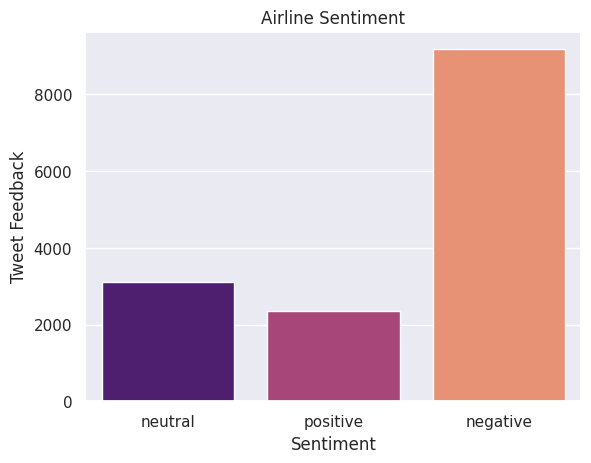

In [78]:
# plotting sentiment data for maximum sentiment value
sns.countplot(x=airline['airline_sentiment'],  data = airline, palette = 'magma')
sns.set_style('whitegrid')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Feedback')
plt.title("Airline Sentiment")
plt.show()

In [79]:
# converting Positive = 2, Neutral = 1 & Negative = 2
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
airline['Encoded Sentiment'] = label.fit_transform(airline['airline_sentiment'])

In [170]:
# view of encoded label with respect to sentiment
airline[['airline_sentiment','Encoded Sentiment']].head(4)

,airline_sentiment,Encoded Sentiment
0,neutral,1
1,positive,2
2,neutral,1
3,negative,0


In [80]:
# text displayed for pre-processing
for i in airline['text']:
  print(i)

In [81]:
# checking for unique words to remove which is used to tag the company as it will be no use in sentiment analyais
airline["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [99]:
# using Regex for text formatting
import re

# Access the 'text' column of the DataFrame as a Series
text = airline['text']

# Create a regex pattern to remove airline mentions along with the '@' symbol
patterns_to_remove = ['@USAirways', '@VirginAmerica', '@United', '@Southwest', '@Delta',"@AmericanAir"]
pattern = r'|'.join(map(re.escape, patterns_to_remove))  # Escape special characters

# Remove specified patterns from text using regex
cleaned_text = text.apply(lambda x: re.sub(pattern, '', x))

# Display the cleaned text
print(cleaned_text)


0                                     What @dhepburn said.
1         plus you've added commercials to the experien...
2         I didn't today... Must mean I need to take an...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
                               ...                        
14635     thank you we got on a different flight to Chi...
14636     leaving over 20 minutes Late Flight. No warni...
14637      Please bring American Airlines to #BlackBerry10
14638     you have my money, you change my flight, and ...
14639     we have 8 ppl so we need 2 know how many seat...
Name: text, Length: 14640, dtype: object


In [104]:
# tokenising the cleaned words
from nltk.tokenize import word_tokenize
tokenize = cleaned_text.apply(word_tokenize)
tokenize

,text
0,"[What, @, dhepburn, said, .]"


In [161]:
# Using TFIDF for converting from text top vector
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(airline['Lemmatized text'])
Y = airline['Encoded Sentiment']

In [162]:
# splitting into train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

# Fitting model to Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [163]:
# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7810792349726776


In [153]:
# Calculating Classification report
report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1830
           1       0.68      0.53      0.60       611
           2       0.84      0.61      0.71       487

    accuracy                           0.80      2928
   macro avg       0.78      0.69      0.73      2928
weighted avg       0.79      0.80      0.79      2928



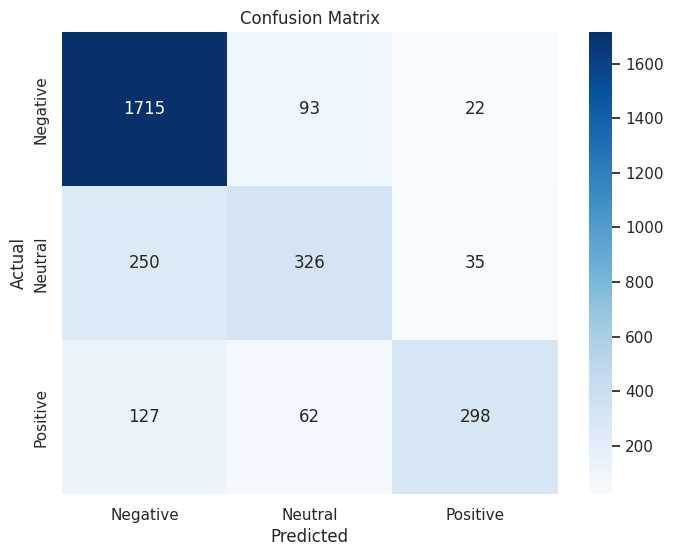

In [157]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt = "d",cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Interpreting the heatmap:**

* Diagonal elements: The values on the main diagonal (top-left to bottom-right) represent the counts of correctly classified instances for each sentiment. Higher values on the diagonal indicate better performance.
* Off-diagonal elements: The values off the diagonal represent misclassifications. For example, a value in the cell corresponding to "Actual: Positive" and "Predicted: Negative" would indicate the number of positive tweets that were incorrectly classified as negative.

**Example Interpretation:**

Let's say you see a large number in the cell corresponding to "Actual: Positive" and "Predicted: Neutral". This indicates that the model is frequently misclassifying positive tweets as neutral. This insight could help you understand areas where the model needs improvement

# **Conclusion**

* Used Label Encoder for converting airline sentimenmt to numbers.
    * Postive = 2
    * Negative = 0
    * Neutral = 1
* After going through text I have used Regex library to remove all the tagged sign used in front of every sentences
* Then I have used word tokenier & processed the text using Word Net Lemmatizer.
* I have used Term Frequency-Inverse Document Frequency to convert text to vector.
* Finally using logistic regression model the accuracy came to be 79%, which is ok for simple project like this.
* Then I have used Confusion Matrix and plotted it using heatmap, to get the Actual VAlues and predicted values.